# Algebraic Equations

**강좌**: *수치해석 프로젝트*

## 개요 
자연 현상을 수치적으로 해석하기 위해서는 시간과 공간을 차분해서, 미분 방정식을 대수 방정식으로 바꿔서 해석한다.

$$
\frac{d^2}{dx^2} f = g(x)
$$

$$
\frac{f_{i+1/2} -2 f_i + f_{i-1/2}}{\Delta x^2} = g(x_i)
$$

$$
\left [
\begin{matrix}
-2 & 1 & 0 & 0 & 0 \\
 1 &-2 & 1 & 0 & 0 \\
 0 & 1 &-2 & 1 & 0 \\
 0 & 0 & 1 &-2 & 1 \\
 0 & 0 & 0 & 1 & -2 
\end{matrix}
\right ]
\left [
\begin{matrix}
f_1 \\ f_2 \\ f_3 \\ f_4 \\ f_5
\end{matrix}
\right ]
=
\left [
\begin{matrix}
g_1 \\ g_2 \\ g_3 \\ g_4 \\ g_5
\end{matrix}
\right ]
$$

공학 문제를 잘 해결하기 위해서는 우선 차분화된 대수방정식을 잘 유도하는 것이 중요하다. 이후 적절한 알고리즘을 적용해서 해석한다.

## 이론
### Gauss Elimination 
- 선형 방정식 $Ax=b$ 를 직접 해석
- Row Operation을 이용해서 Upper diagonal matrix 구성

$$
\left[ 
    \begin{array}{ccc|c}
        2 & 1 & 1 & 5\\
        4 & 6 & 0 & -2 \\
       -2 & 7 & 2 & 9 
    \end{array}
\right]
\rightarrow
\left[ 
    \begin{array}{ccc|c}
        2 & 1 & 1 & 5\\
        0 &-8 &-2 & -12 \\
        0 & 8 & 3 & 14 
    \end{array}
\right]
\rightarrow
\left[ 
    \begin{array}{ccc|c}
        2 & 1 & 1 & 5\\
        0 &-8 &-2 & -12 \\
        0 & 0 & 1 & 2 
    \end{array}
\right]
$$

$$
a_{i,j} - \frac{a_{i-1, j}}{a_{i-1,i-1}} \times a_{i,i} ~~~ \textrm{for}~~j < i
$$

- Back substitution : $w=2, v=1, w=1$

#### Python 구현

In [1]:
def gauss_eliminate(a, b, verbose=False):
    """
    Gauss Elimination
    
    Parameters
    ----------
    a : matrix
        Linear operator
    b : array
        Result
    verbose : boolean
        중간 출력 여부
        
    Returns
    --------
    x : array
        Solution
    """   
    # Check size
    m, n = np.array(a).shape
    l = len(b)
    
    if (m != n) or (n != l) or (m != l):
        raise ValueError('Wrong shape', m,n,l)
        
    # Construct augmented matrix 
    # Horizontal stack : (3x3) (3x1) -> (3x4)
    au = np.hstack([a, np.array(b)[:, None]])
    
    # Apply row operations
    for i in range(n):
        if au[i,i] == 0.0:
            raise ValueError('Pivot is zero')
        
        for j in range(i+1, n):
            ratio = au[j, i] / au[i, i]
            
            for k in range(n+1):
                au[j, k] = au[j, k] - ratio *au[i, k]
    
    if verbose:
        print('Augmented matrix\n', au)
    
    # Back substitution
    x = np.empty(n)   
    x[n-1] = au[n-1, n] / au[n-1, n-1]
    
    for i in range(n-2, -1, -1):
        x[i] = au[i, n]
        
        for j in range(i+1, n):
            x[i] = x[i] - au[i, j]*x[j]
            
        x[i] /= au[i, i]
        
    return x

In [2]:
import numpy as np

a = np.array([[2,1,1], [4,-6,0],[-2,7,2]])
b = np.array([5, -2, 9])

x = gauss_eliminate(a, b, verbose=True)
print(x)

Augmented matrix
 [[  2   1   1   5]
 [  0  -8  -2 -12]
 [  0   0   1   2]]
[1. 1. 2.]


### ill-conditioned Problem
- 2x2 선형 방정식

$$
\left [
\begin{matrix}
1 & 1 \\
1 & 1+\epsilon_1
\end{matrix}
\right ]
\left [
\begin{matrix}
x \\ y
\end{matrix}
\right ]
=
\left [
\begin{matrix}
2 \\ 2 + \epsilon_2
\end{matrix}
\right ]
$$

  - $\epsilon_2=0$ : $(x,y) = (2, 0)$
  - $\epsilon_2 \ne 0$ : $(x,y) = (1, 1)$

In [3]:
e1 = 1e-3
a = np.array([[1, 1], [1, 1+e1]])
b = np.array([2, 2])

gauss_eliminate(a, b)

array([2., 0.])

In [4]:
e1 = 1e-3
a = np.array([[1, 1], [1, 1+e1]])
b = np.array([2, 2+e1])

gauss_eliminate(a, b)

array([1., 1.])

- $\epsilon_1$, $\epsilon_2$ 가 매우 작을 때?

In [5]:
for n in range(1, 16):
    e1 = 10**(-n)
    
    a = np.array([[1, 1], [1, 1+e1]])
    b = np.array([2, 2+e1])
    
    x = gauss_eliminate(a, b)
    print("Exponent of e2: -{}, Sol : {}".format(n, x))

Exponent of e2: -1, Sol : [1. 1.]
Exponent of e2: -2, Sol : [1. 1.]
Exponent of e2: -3, Sol : [1. 1.]
Exponent of e2: -4, Sol : [1. 1.]
Exponent of e2: -5, Sol : [1. 1.]
Exponent of e2: -6, Sol : [1. 1.]
Exponent of e2: -7, Sol : [1. 1.]
Exponent of e2: -8, Sol : [1. 1.]
Exponent of e2: -9, Sol : [1. 1.]
Exponent of e2: -10, Sol : [1. 1.]
Exponent of e2: -11, Sol : [1. 1.]
Exponent of e2: -12, Sol : [1. 1.]
Exponent of e2: -13, Sol : [1. 1.]
Exponent of e2: -14, Sol : [0.97777778 1.02222222]
Exponent of e2: -15, Sol : [1.2 0.8]


### Round-off Error

- 컴퓨터는 실수를 제한된 범위에서 저장함
   - 32 bit vs 64 bit

- 부동 소수점 (Floating Point) 으로 표현하면 상당히 넓은 범위로 숫자를 표현할 수 있음

   - 부호, 지수, 가수 로 나눠서 실수를 저장함
   - IEEE-754 규격
   
:::{figure-md} markdown-fig
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Float_example.svg/2880px-Float_example.svg.png" alt="ieee754-fig">

Floating Point (From Wikipedia)
:::

- Machine epsilon으로 인해 제한된 범위로 숫자를 저장함에 따라 발생하는 오차
   - $1 + \epsilon$ ?

In [6]:
# Double precision (64 bit)
a, b = 1.0, 1e-16
a + b

1.0

In [7]:
# Single precision (32 bit)
a = np.array(1.0, dtype=np.float32)
b = np.array(1e-8, dtype=np.float32)

a+b

1.0

- Machine epsilon
  - ``np.finfo`` 함수를 이용해서 확인 가능

In [8]:
# 64 bit
print("Machine epsilon for 64 bit: ", np.finfo(1.0).resolution)

# 32 bit
print("Machine epsilon for 32 bit: ", np.finfo(np.float32).resolution)

Machine epsilon for 64 bit:  1e-15
Machine epsilon for 32 bit:  1e-06


In [9]:
# DIY (Do it yourself) : Ill-conditioned 문제를 32 bit로 계산해보시오

### Computational Costs

- 선형 방정식 계산 시간은 $O(n^3)$ 임
- Gauss Elimination 코드 계산 시간 확인

In [10]:
size = np.arange(2, 15)
elapsed = []

for n in size:
    a = np.random.rand(n, n)
    b = np.random.rand(n)
    
    print("Size of matrix : ", n)
    t = %timeit -o gauss_eliminate(a, b)
    elapsed.append(t.average)

Size of matrix :  2
4.52 µs ± 46.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Size of matrix :  3
7.89 µs ± 115 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Size of matrix :  4
13.7 µs ± 96.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Size of matrix :  5
22.1 µs ± 201 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Size of matrix :  6
34.5 µs ± 495 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Size of matrix :  7
51.1 µs ± 338 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Size of matrix :  8
72.9 µs ± 1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Size of matrix :  9
100 µs ± 1.05 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Size of matrix :  10
134 µs ± 954 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Size of matrix :  11
174 µs ± 1.7 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Size of matrix :  12
223 µs ± 3.71 µs per loop (mean ± st

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

Text(0, 0.5, 'Elapsed time')

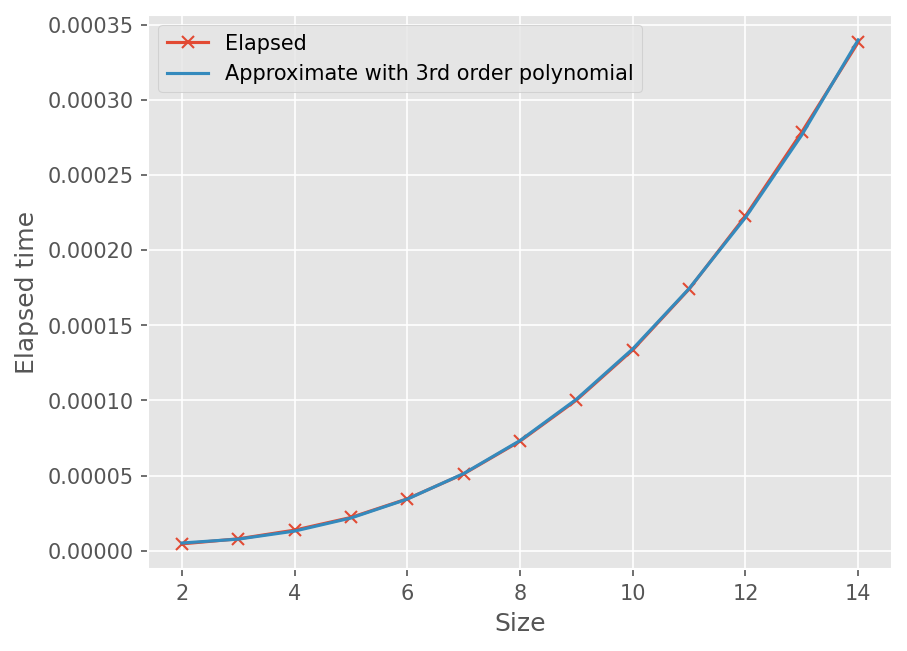

In [12]:
fig, ax = plt.subplots()
ax.plot(size, elapsed, marker='x')

# Approximate elapsed time with 3rd order polynomial
z = np.polyfit(size, elapsed, 3)
appxf = np.poly1d(z)

ax.plot(size, appxf(size))
ax.legend(['Elapsed', 'Approximate with 3rd order polynomial'])
ax.set_xlabel('Size')
ax.set_ylabel('Elapsed time')

## Scipy 활용

`scipy.linalg` 모듈은 다양한 행렬 계산 알고리즘을 제공함
* `numpy.linalg` 는 제한된 기능을 제공

**참고**
* https://scipy-lectures.org/intro/scipy.html#linear-algebra-operations-scipy-linalg
* https://docs.scipy.org/doc/scipy/tutorial/linalg.html

### Solve linear system

- `linalg.solve` : $Ax=b$ 해석
- `linalg.inv` : $A^{-1}$ 계산
- `linalg.det` : $det(A)$ 계산
- `linalg.norm` : 벡터, 행렬의 Norm 계산

In [13]:
from scipy import linalg

size = np.arange(2, 15)
elapsed_sc = []

for n in size:
    a = np.random.rand(n, n)
    b = np.random.rand(n)
    
    print("Size of matrix : ", n)
    t = %timeit -o linalg.solve(a, b)
    elapsed_sc.append(t.average)

Size of matrix :  2
9.03 µs ± 62.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Size of matrix :  3
9.56 µs ± 75.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Size of matrix :  4
9.44 µs ± 56.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Size of matrix :  5
9.49 µs ± 56.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Size of matrix :  6
9.86 µs ± 76.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Size of matrix :  7
10 µs ± 95.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Size of matrix :  8
10.4 µs ± 93.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Size of matrix :  9
10.7 µs ± 66.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Size of matrix :  10
11.1 µs ± 118 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Size of matrix :  11
11.2 µs ± 144 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Size of matrix :  12
11.7 µs ± 225 ns per 

Text(0, 0.5, 'Elapsed time')

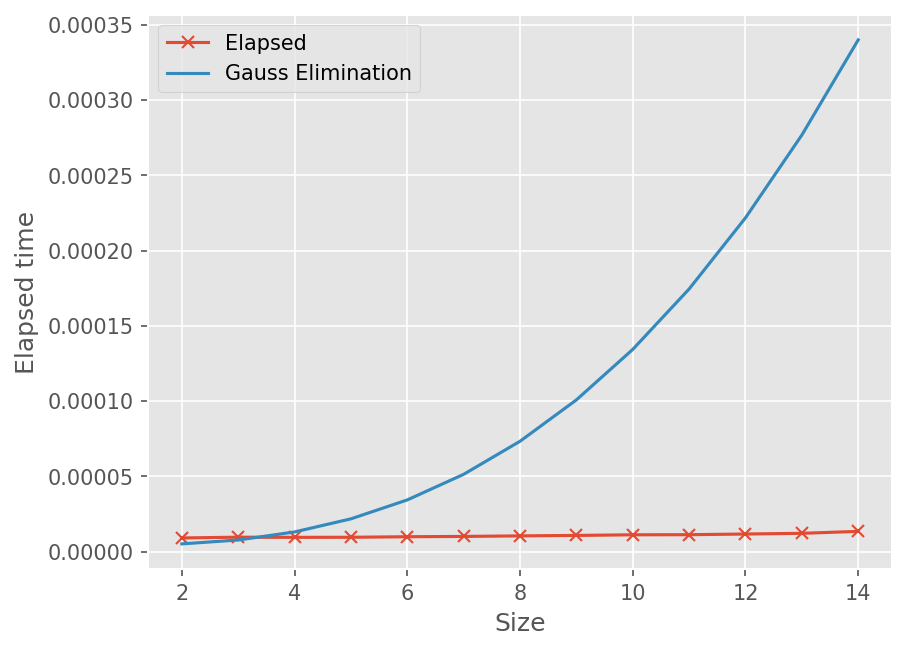

In [14]:
# 계산 시간 비교
fig, ax = plt.subplots()
ax.plot(size, elapsed_sc, marker='x')

# Compare Gauss elimination
ax.plot(size, appxf(size))
ax.legend(['Elapsed', 'Gauss Elimination'])
ax.set_xlabel('Size')
ax.set_ylabel('Elapsed time')

### Decomposition
- LU (Lower Upper) Decomposition
- Singual Value Decomposition (SVD)
- QR Decomposition

### Eigenvalue 
- `linalg.eig` : Eigenvalue, Eigenvector 계산
    * $Ax = \lambda x$

### Numerical Libaries

선형 대수 관련 매우 다양한 수치 라이브러리가 존재함

- BLAS (Basic Linear Algebra Subprograms)
   * netlib 에서 Reference 제공 (Fortran)
   * Intel MKL, NVIDIA CUBLAS 등 제조사에서 최적화
   * OpenBLAS 등과 같이 open source 프로젝트 존재   
   
- LAPACK
   * 선형대수학 라이브러리
   * BLAS를 활용함
   
   
### Sparse Matrix

많은 element가 0이고 일부만 값을 가지는 매우 크고 성긴 행렬임.
효과적으로 저장하고, 관련된 선형대수 계산을 하는 라이브러리가 존재함

- `scipy.sparse` 내 다양한 함수가 존재함

## Spring-Mass System

강체 사이에 스프링이 연결되어 있다고 생각하자. 양 끝단은 고정되어 있다.

:::{figure-md} markdown-fig
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTiQYrIYKFM00MYca-ShvOF8_zkFOm0CiOTsw&usqp=CAU" alt="bisect-spring-mass">

Example of Spring-Mass System
:::

각 스프링과 강체에 대해서 다음 변수들을 고려하자

- Displacements of masses: u
- Elongations of springs : e
- Internal forces in springs : w
- External forces in masses : f

### Elongation 
$$
\begin{align}
e_1 &= u_1 \\
e_2 &= u_2 - u_1 \\
e_3 &= - u_2
\end{align}
$$

이를 Matrix 형태로 나타내면 다음과 같다.

$$
\left[
\begin{matrix}
e_1 \\ e_2 \\ e_3
\end{matrix}
\right]
=
\left[
\begin{matrix}
1 & 0 \\
-1 & 1 \\
0 & -1
\end{matrix}
\right]
\left[
\begin{matrix}
u_1 \\ u_2
\end{matrix}
\right]
$$

### Hooke's Law
각 Spring에 걸리는 내부 힘은 Elongation에 비례한다.

$$
w_i = k_i e_i
$$

이를 Matrix 형태로 나타내면 다음과 같다.

$$
\left[
\begin{matrix}
w_1 \\ w_2 \\ w_3
\end{matrix}
\right]
=
\left[
\begin{matrix}
k_1 & 0 & 0\\
0 & k_2 & 0\\
0 & 0 & k_3\\
\end{matrix}
\right]
\left[
\begin{matrix}
e_1 \\ e_2 \\ e_3
\end{matrix}
\right]
$$

### Balance Equation
각 물체에 작용하는 힘은 Spring이 잡아당기는 내력과 외력 (중력)이 있으며 이들이 균형을 이루어야 한다.

$$
\begin{align}
f_1 = w_1 - w_2\\
f_2 = w_2 - w_3
\end{align}
$$

이를 Matrix 형태로 나타내면 다음과 같다.

$$
\left[
\begin{matrix}
f_1 \\ f_2
\end{matrix}
\right]
=
\left[
\begin{matrix}
1 & -1 & 0 \\
0 & 1 & -1
\end{matrix}
\right]
\left[
\begin{matrix}
w_1 \\ w_2 \\ w_3
\end{matrix}
\right]
$$

### 최종 방정식

위 3개의 방정식을 하나로 표현하면 다음과 같다.

$$
\begin{align}
\left[
\begin{matrix}
f_1 \\ f_2
\end{matrix}
\right]
&= 
\left[
\begin{matrix}
1 & -1 & 0 \\
0 & 1 & -1
\end{matrix}
\right]
\left[
\begin{matrix}
k_1 & 0 & 0\\
0 & k_2 & 0\\
0 & 0 & k_3 
\end{matrix}
\right]
\left[
\begin{matrix}
1 & 0 \\
-1 & 1\\
0 & -1
\end{matrix}
\right]
\left[
\begin{matrix}
u_1 \\ u_2
\end{matrix}
\right] \\
&= 
\left[
\begin{matrix}
k_1+k_2 & -k_2 \\
-k_2 & k_2+k_3 
\end{matrix}
\right]
\left[
\begin{matrix}
u_1 \\ u_2
\end{matrix}
\right]
\end{align}
$$

이 행렬을 Stiffness matrix라 한다.

$$
K = \left[
\begin{matrix}
k_1+k_2 & -k_2 \\
-k_2 & k_2+k_3 
\end{matrix}
\right]
$$

### 예제
질량은 $m_1 = 1$, $m_2=1$ 이다. 스프링 계수는 $1, 1, 1$ 이다. x축 방향으로 중력이 작용하는 경우에 대해서 평형에 도달했을 때 변위를 구하시오.

In [15]:
m1, m2 = 1, 1
k1, k2, k3 = 1, 1, 1

mass = np.array([m1, m2])

In [16]:
a = np.array([[1, -1, 0], [0, 1, -1]])
b = np.diag([k1, k2, k3])
c = a.T

stiff = a@ b @ c

In [17]:
np.linalg.solve(stiff, mass)

array([1., 1.])

### 진동 문제
Spring Mass system이 진동하는 경우 Newton의 2법칙에 따라 다음과 같이 표현할 수 있다.

$$
M \frac{d^2 u}{dt^2} + K u = 0
$$

#### One Mass and One Spring
이 경우 지배방정식은 다음과 같이 1개의 식이 된다.

$$
m \frac{d^2 u}{dt^2} + k u = 0
$$

이 상미분 방정식의 해는 다음과 같다.

$$
u(t) = A\cos \left(\sqrt{\frac{k}{m}} t \right) + B\sin \left(\sqrt{\frac{k}{m}} t \right)
$$


#### Spring Mass system
1개의 Spring-Mass 해를 바탕으로 System의 해를 다음과 같이 생각하자.

$$
u_i = A_i \sin(\omega t), i=1, 2
$$

이를 적용하면, 방정식에 적용하면

$$
\begin{align}
\sin(\omega t)(-m_1 A_1 \omega^2 + (k_1 + k_2) A_1 - k_2 A_2) = 0, \\
\sin(\omega t)(-m_2 A_2 \omega^2 - k_2 A_1 + (k_2 + k_3) A_2) = 0.
\end{align}
$$

이를 정리하면 다음과 같다.

$$
-\omega^2 \left[
\begin{matrix}
m_1 & 0 \\
0 & m_2
\end{matrix} 
\right]
\left[
\begin{matrix}
A_1 \\ A_2
\end{matrix}
\right]
+
\left[
\begin{matrix}
k_1+k_2 & -k_2 \\
-k_2 & k_2+k_3 
\end{matrix} 
\right]
\left[
\begin{matrix}
A_1 \\ A_2
\end{matrix}
\right] = 0
$$

이 식에서 $\omega^2$ 은 다음 방정식의 고유치이다.

$$
\lambda Mx = Kx.
$$

또는

$$
M^{-1}Kx = \lambda x.
$$

여기서 고유치는 $\lambda=\omega^2$ 이고, 고유벡터 $x=[A_1, A_2]^T$ 이다.

즉 진동의 주기는 고유치의 제곱근이고, 모드는 고유벡터와 같다.


#### 예제
이 시스템의 진동 주기를 구하시오.

In [18]:
# Mass matrix
mass = np.diag([m1, m2])

# Solve eigenvalue/eigenvector problem
lams, xs = linalg.eig(linalg.inv(mass)@ stiff)

for l, x in zip(lams, xs.T):
    print('Eigenvalue :{}, Eigenvector :{}'.format(l, x))
    print(r"$\Omega$ = {}, Mode={}".format(np.sqrt(l.real), x))

Eigenvalue :(3+0j), Eigenvector :[ 0.70710678 -0.70710678]
$\Omega$ = 1.7320508075688772, Mode=[ 0.70710678 -0.70710678]
Eigenvalue :(1+0j), Eigenvector :[0.70710678 0.70710678]
$\Omega$ = 1.0, Mode=[0.70710678 0.70710678]


Text(0.5, 1.0, 'Mode #2')

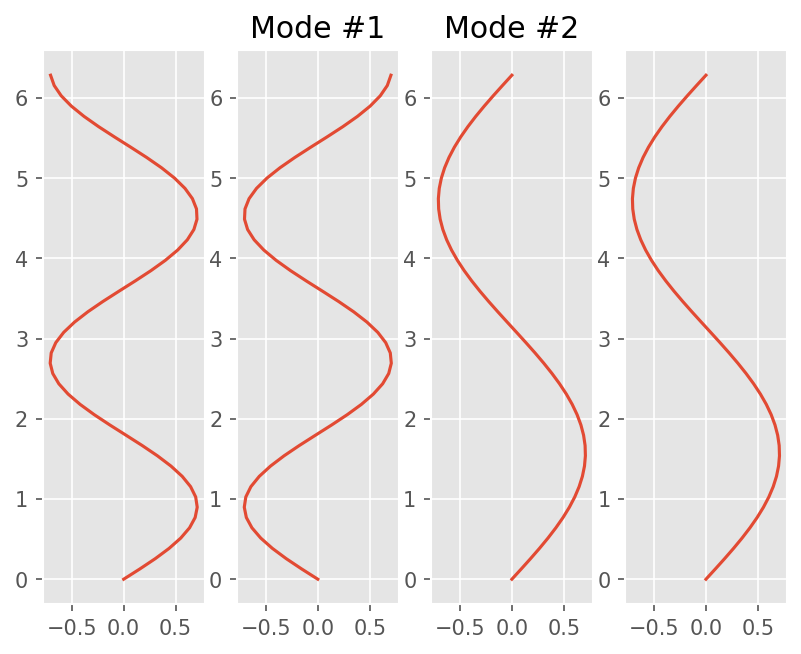

In [19]:
t = np.linspace(0, 2*np.pi)

# Mode 1
l1, x1 = lams[0], xs.T[0]
omg1 = np.sqrt(l1.real)
u1 = np.sin(omg1*t)*x1[:, None]

# Mode 2
l2, x2 = lams[1], xs.T[1]
omg2 = np.sqrt(l2.real)
u2 = np.sin(omg2*t)*x2[:, None]

fig, ax = plt.subplots(1,4)
ax[0].plot(u1[0], t)
ax[1].plot(u1[1], t)
ax[1].set_title("Mode #1")

ax[2].plot(u2[0], t)
ax[3].plot(u2[1], t)
ax[2].set_title("Mode #2")